In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer


train_df = pd.read_csv("adult_train.csv")
test_df = pd.read_csv("adult_test.csv")

### Task 1

Step 1

In [26]:
y_train = train_df.target
x_train = train_df.drop("target", axis=1)

y_test = test_df.target
x_test = test_df.drop("target", axis=1)

Step 2

In [28]:
x_train_dicts = x_train.to_dict("records")
x_test_dicts = x_test.to_dict("records")



dv = DictVectorizer()
x_train_encoded = dv.fit_transform(x_train_dicts)
x_test_encoded = dv.transform(x_test_dicts)


In [30]:
clf_forest = RandomForestClassifier()
train_scores = cross_val_score(clf_forest, x_train_encoded, y_train)

Step 3

In [31]:
pipeline = make_pipeline(
  DictVectorizer(),
  RandomForestClassifier()
)

In [32]:
pipeline.fit(x_train_dicts, y_train)
train_preds = pipeline.predict(x_train_dicts)
accuracy_score(y_train, train_preds)

0.9763213660514112

### Task 2

In [64]:
clf_scores = []

# Test a range of max depth
for i in range(1, 12):
    clf_model = DecisionTreeClassifier(max_depth=i)
    clf_model.fit(x_train_encoded, y_train)
    train_score = accuracy_score(y_train, clf_model.predict(x_train_encoded))
    test_score = accuracy_score(y_test, clf_model.predict(x_test_encoded))
    clf_scores.append((train_score, test_score))


Underfitting and overfitting

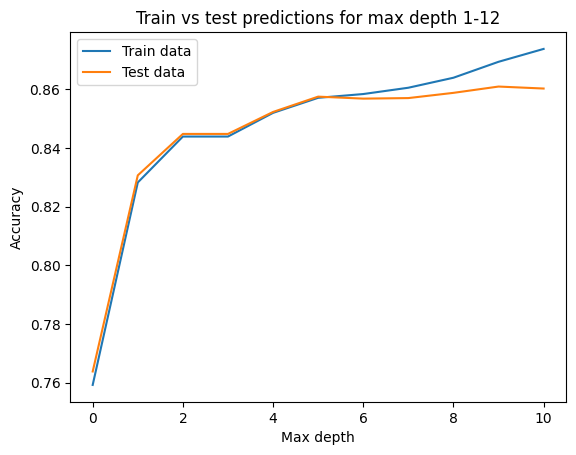

In [65]:
plt.plot(clf_scores)
plt.legend(["Train data", "Test data"])
plt.title("Train vs test predictions for max depth 1-12")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show()

The effects of increasing max depth is similar to the task in A1 where both the test and train accuracy increased together until the depth of six whereupon the model became overfitted. But not as drastic as the regression model which became a lot worse post a depth of six, for this model it seems to reach a plateau of 86% while the training data is still increasing.

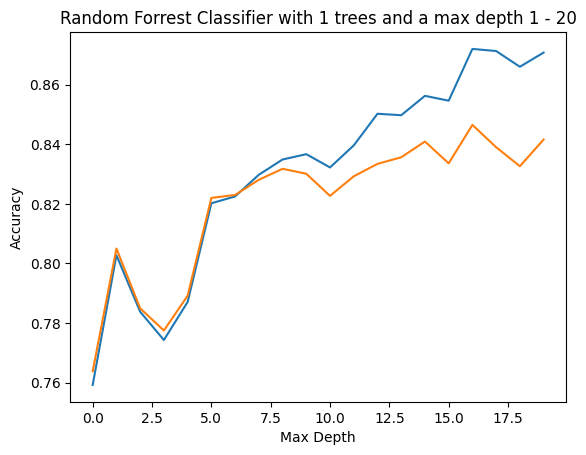

0.8256108454297536


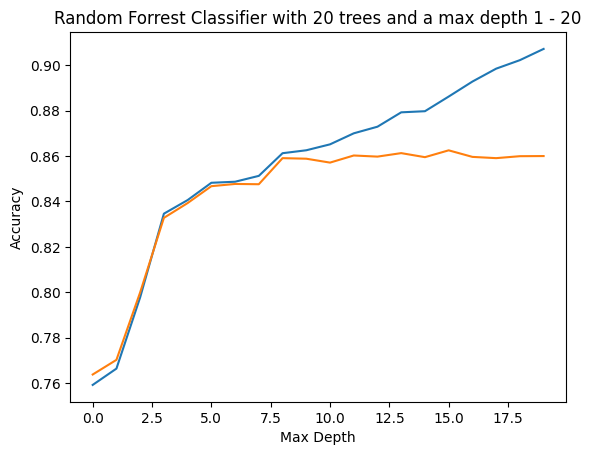

0.8497052728864325


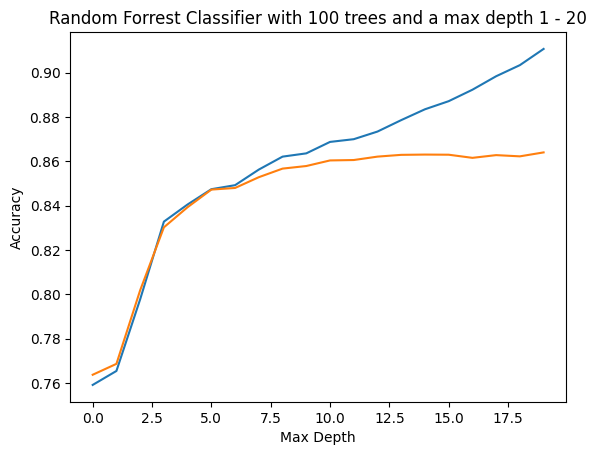

0.8507340921093081


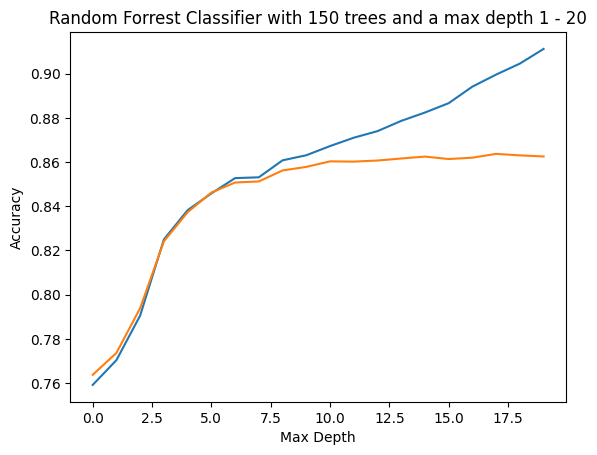

0.8500323446909069


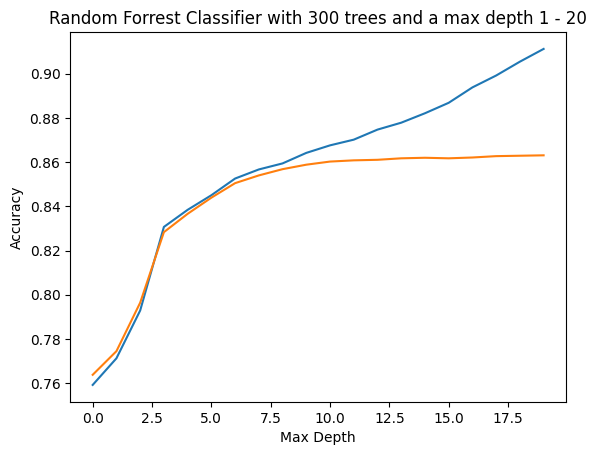

0.8505390788577231


In [67]:
clf_dict = {}
num_trees = [1, 20, 100, 150, 300]
# Test a range of max depth
for j in num_trees:
    clf_dict[j] = []
    for i in range(1, 21):
        clf_model = RandomForestClassifier(n_estimators=j, max_depth=i, n_jobs=-1)
        clf_model.fit(x_train_encoded, y_train)
        train_score = accuracy_score(y_train, clf_model.predict(x_train_encoded))
        test_score = accuracy_score(y_test, clf_model.predict(x_test_encoded))
        clf_dict[j].append((train_score, test_score))
    plt.plot(clf_dict[j])
    plt.title(f"Random Forrest Classifier with {j} trees and a max depth 1 - 20")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.show()
    print(np.mean(clf_dict[j]))
        


Some things that you might want to discuss in your report:

What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?
What happens with the curve for random forests as the ensemble size grows?
What happens with the best observed test set accuracy as the ensemble size grows?
What happens with the training time as the ensemble size grows?

When comparing the random forrest classifier with a single tree and a decision tree classifier there is a difference in the performance. The reason for this is that a random

In [53]:
clf_model.feature_importances_

107

In [55]:
dv.feature_names_

107

In [62]:
sorted([(x, y) for x,y in zip(clf_model.feature_importances_, dv.feature_names_)])[::-1]

[(0.14302203022194218, 'capital-gain'),
 (0.10116441159725408, 'age'),
 (0.09976608435901997, 'marital-status=Married-civ-spouse'),
 (0.08985508582784502, 'education-num'),
 (0.07420962722783649, 'relationship=Husband'),
 (0.06952312731143943, 'hours-per-week'),
 (0.04084154644974322, 'capital-loss'),
 (0.04046518349828603, 'marital-status=Never-married'),
 (0.026126866500626855, 'occupation=Exec-managerial'),
 (0.022676599079628452, 'occupation=Prof-specialty'),
 (0.018235841444612447, 'education=Bachelors'),
 (0.016703974493865965, 'sex=Male'),
 (0.016592243844105504, 'relationship=Not-in-family'),
 (0.016561740394811883, 'relationship=Own-child'),
 (0.015565914338382848, 'relationship=Wife'),
 (0.012276467936615937, 'education=Masters'),
 (0.011469876859809953, 'sex=Female'),
 (0.009679891265906149, 'education=HS-grad'),
 (0.008612534620207722, 'occupation=Other-service'),
 (0.008360724236094368, 'marital-status=Divorced'),
 (0.008221287985054683, 'workclass=Self-emp-not-inc'),
 (0.